In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
os.getcwd()

'/Users/lsafari/drone_steering/models/playground'

In [5]:
os.chdir('../..')
from app_local.module import DataEnsembler, GestureTransformer

In [6]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/')

In [7]:
de.load_data()
de.assemble_data(tolerance_range = 500, max_error = 200)
de.display_information()

i: 0 	shape X: (565, 17, 16) 	shape y: (565,) 	count: 27
i: 1 	shape X: (649, 17, 16) 	shape y: (649,) 	count: 18
i: 2 	shape X: (467, 17, 16) 	shape y: (467,) 	count: 41
i: 3 	shape X: (441, 17, 16) 	shape y: (441,) 	count: 4
i: 4 	shape X: (437, 17, 16) 	shape y: (437,) 	count: 21
i: 5 	shape X: (477, 17, 16) 	shape y: (477,) 	count: 46
i: 6 	shape X: (588, 17, 16) 	shape y: (588,) 	count: 44
i: 7 	shape X: (491, 17, 16) 	shape y: (491,) 	count: 41
i: 8 	shape X: (493, 17, 16) 	shape y: (493,) 	count: 18
i: 9 	shape X: (557, 17, 16) 	shape y: (557,) 	count: 66
i: 10 	shape X: (520, 17, 16) 	shape y: (520,) 	count: 21
i: 11 	shape X: (570, 17, 16) 	shape y: (570,) 	count: 42
i: 12 	shape X: (489, 17, 16) 	shape y: (489,) 	count: 0
i: 13 	shape X: (525, 17, 16) 	shape y: (525,) 	count: 37
i: 14 	shape X: (499, 17, 16) 	shape y: (499,) 	count: 0
i: 15 	shape X: (532, 17, 16) 	shape y: (532,) 	count: 34
i: 16 	shape X: (417, 17, 16) 	shape y: (417,) 	count: 33
i: 17 	shape X: (509, 17, 1

In [8]:
feature_names = list(de.LabelGenerators[0].feature_names)
feat_dict = {feature:feature_names.index(feature) for feature in feature_names}

In [33]:
body_part='leftWrist'
kx = body_part + '_x'
ky = body_part + '_y'

lgen = de.LabelGenerators[0]
lgen.error_df
    

,real_start,real_end,start_idx,start_calc,end_idx,end_calc
1,4860,7160,40,4800,60,7200
2,8960,11350,74,8880,95,11400
3,13020,15220,108,12960,127,15240
6,24980,27180,208,24960,227,27240
10,41000,43260,341,40920,361,43320
11,44890,47190,374,44880,394,47280
12,49060,51320,408,48960,428,51360
13,53020,55350,441,52920,462,55440
14,57000,59420,475,57000,496,59520
15,61000,63380,508,60960,529,63480


In [24]:
def plot_charts(de, file_id, tail=5, head=5, plots_per_row=30, body_part='leftWrist'):

    kx = body_part + '_x'
    ky = body_part + '_y'

    lgen = de.LabelGenerators[file_id]
    lgen.sequence_end_time[lgen.y > 0] # tbd
    np.where(lgen.y > 0)               # tbd
    y = lgen.y
    n = len(lgen.y)

    gt = GestureTransformer(byrow=True, feature_names=feature_names)
    X = gt.transform(lgen.X)
    s = lgen.X.shape[1]
    d = lgen.labeled_data
    
    dims = d[feature_names].shape
    D = d[feature_names].values.reshape(1,dims[0],dims[1])
    D = gt.transform(D).reshape(dims[0],dims[1])
    Dx = D[:,feat_dict[kx]]
    Dy = D[:,feat_dict[ky]]    
    
    for j in range(n // plots_per_row + 1):
        
        plt.figure(figsize=(2 * plots_per_row, 2))
        
        for i in range (plots_per_row):
            plt.subplot(1, plots_per_row, i + 1)
            index = j*plots_per_row + i

            # specify axes range
            axes = plt.gca()
            axes.set_xlim([-2,2])
            axes.set_ylim([-2,2])
            axes.get_yaxis().set_visible(False)
            axes.get_xaxis().set_visible(False)

            if index < n:
                if (int(y[index])>0):
                    axes.set_facecolor((0.95, 0.95, 0.95))

                # movement
                l1, u1 = max(0,index - s), index
                plt.plot(Dx[l1:u1],Dy[l1:u1],color = "xkcd:baby blue")

                # past
                l2, u2 = max(0,index - s - tail), max(0,index-s)
                plt.plot(Dx[l2:u2+1],Dy[l2:u2+1],linestyle = "--",color = "green")

                # future
                l3, u3 = index, min(index + head,dims[0])
                plt.plot(Dx[l3:u3],Dy[l3:u3],linestyle = "--",color = "red")
                
                # current frame
                plt.plot(Dx[u1-1],Dy[u1-1],color = "xkcd:baby blue",marker = "o")

                plt.title(str(index) + "/" + str(round(lgen.sequence_end_time[index]/1000,2)) + " l=" + str(int(y[index])))

        plt.show()
        plt.close()    

Available body parts:
```
leftElbow
leftHip
leftShoulder
leftWrist
rightElbow
rightHip
rightShoulder
rightWrist
```

In [25]:
de.combined_data_files_df

,filename_features,filename_labels
0,features_move_p_01_120.csv,labels_move_p_01.csv
1,features_move_c_01_120.csv,labels_move_c_01.csv
2,features_land_l_03_120.csv,labels_land_l_03.csv
3,features_land_c_01_120.csv,labels_land_c_01.csv
4,features_land_l_02_120.csv,labels_land_l_02.csv
5,features_land_c_03_120.csv,labels_land_c_03.csv
6,features_move_l_01_120.csv,labels_move_l_01.csv
7,features_land_c_02_120.csv,labels_land_c_02.csv
8,features_land_l_01_120.csv,labels_land_l_01.csv
9,features_flip_l_01_120.csv,labels_flip_l_01.csv


**Legend:**<br>
<span style="color:blue">gesture</span><br>
<span style="color:red">frames *after* gesture</span><br>
<span style="color:green">frames *before* gesture</span>

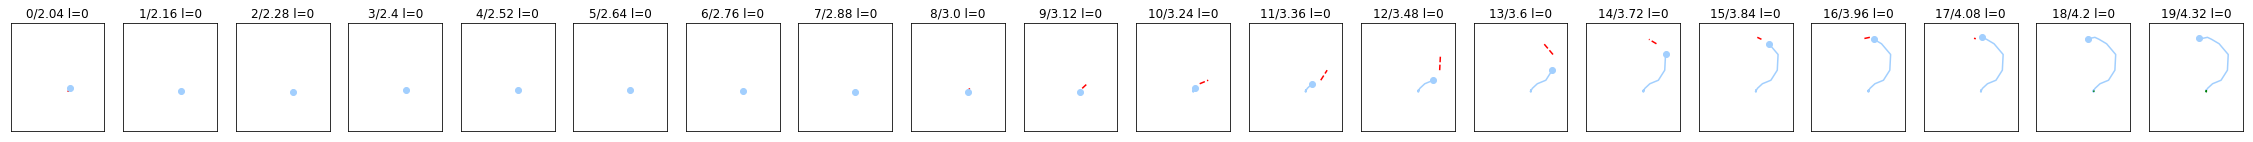

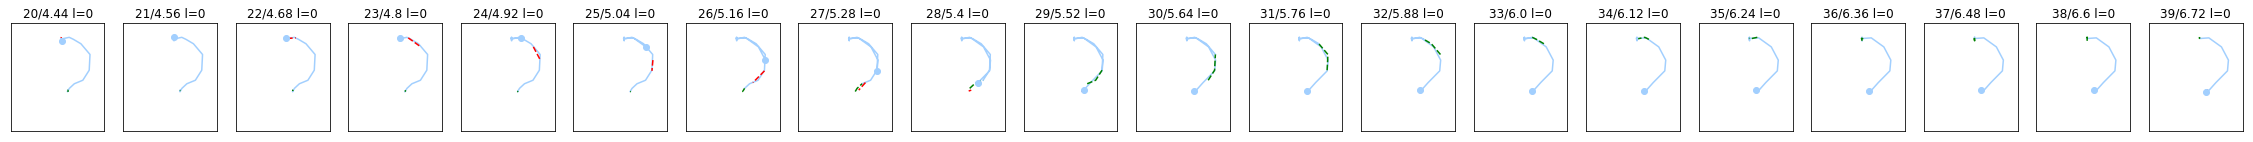

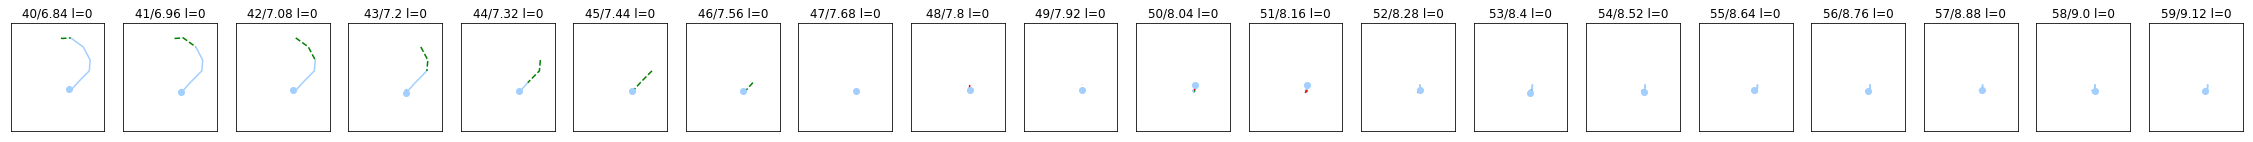

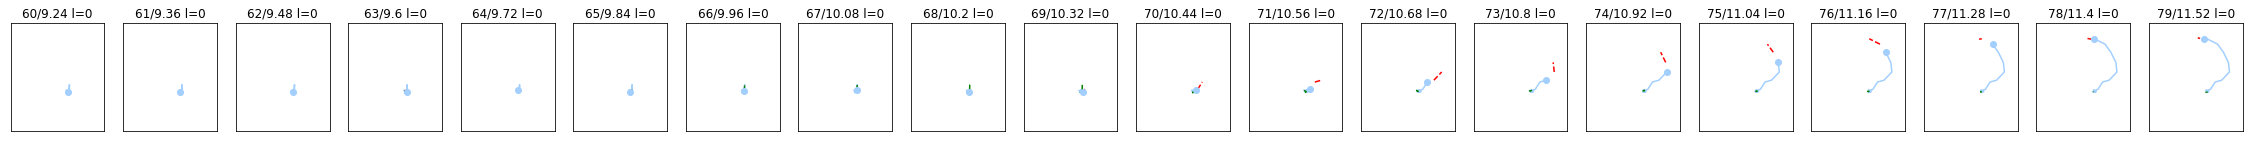

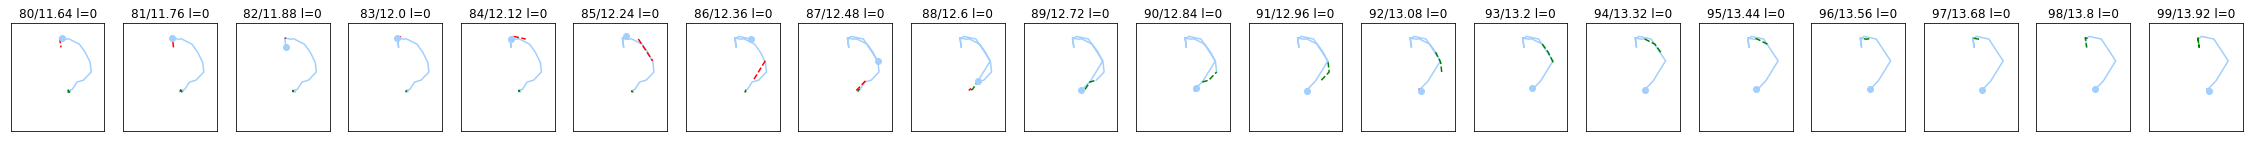

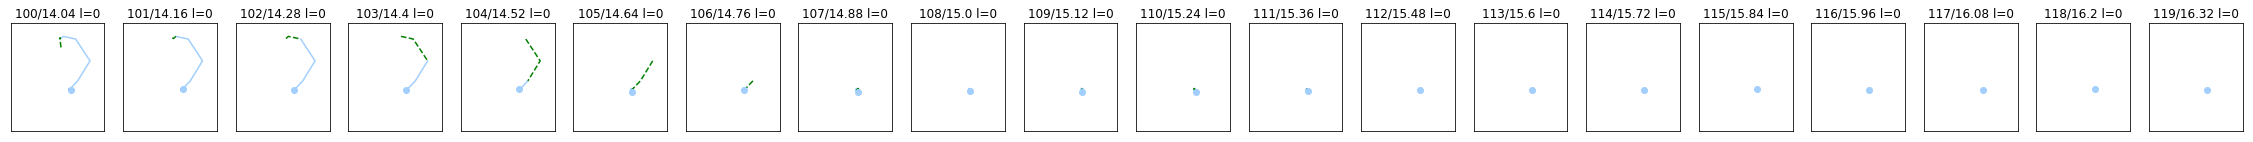

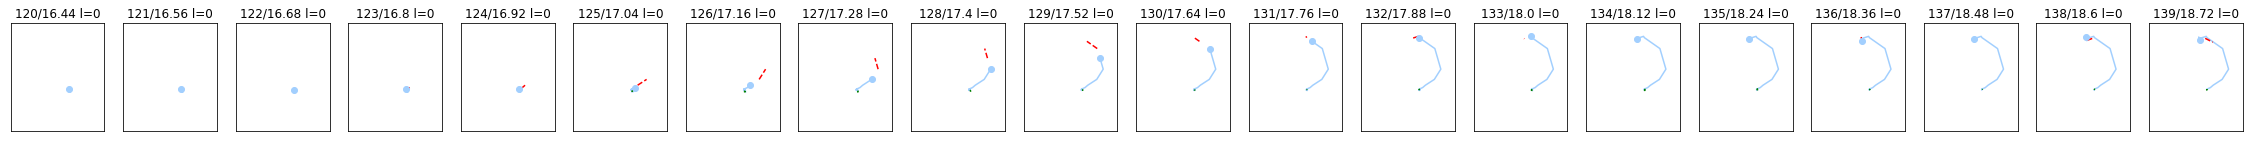

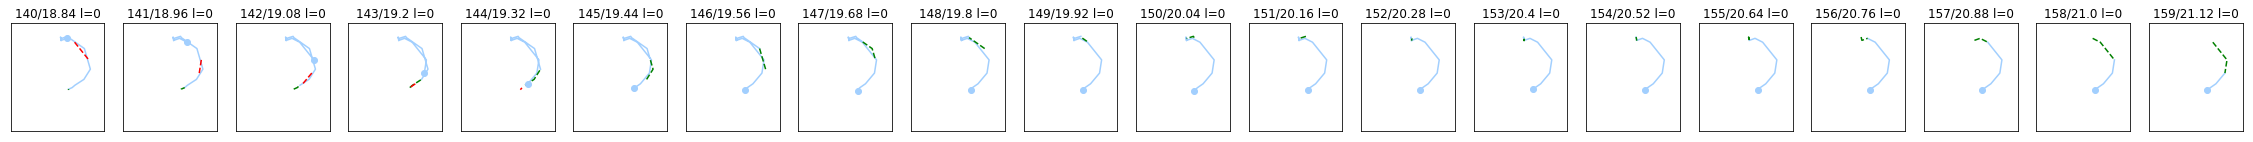

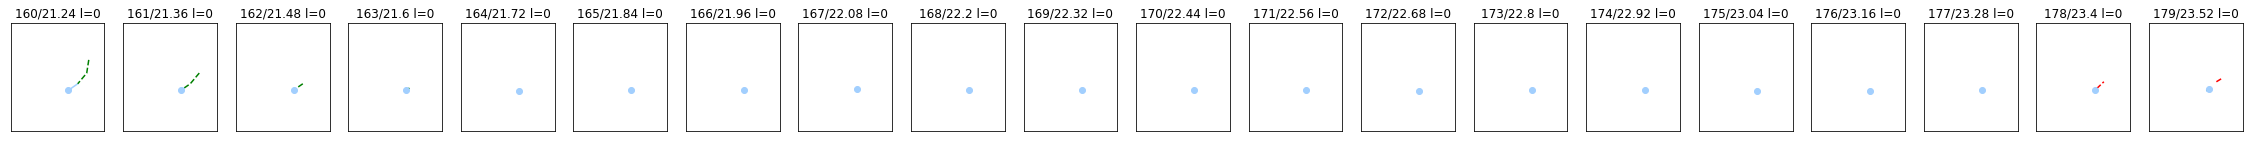

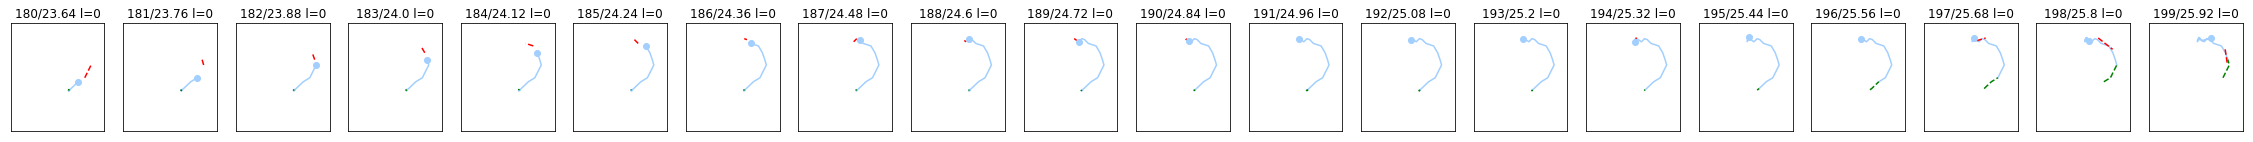

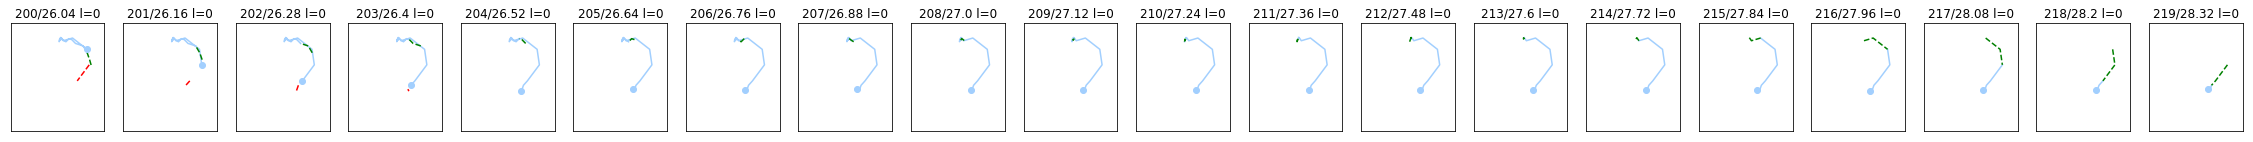

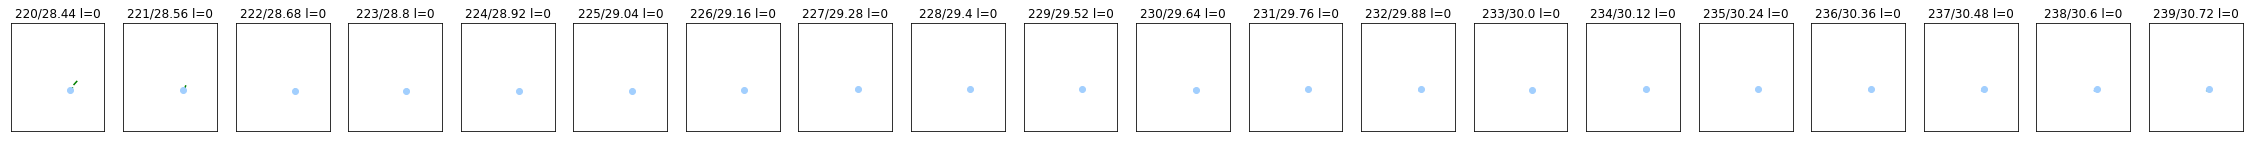

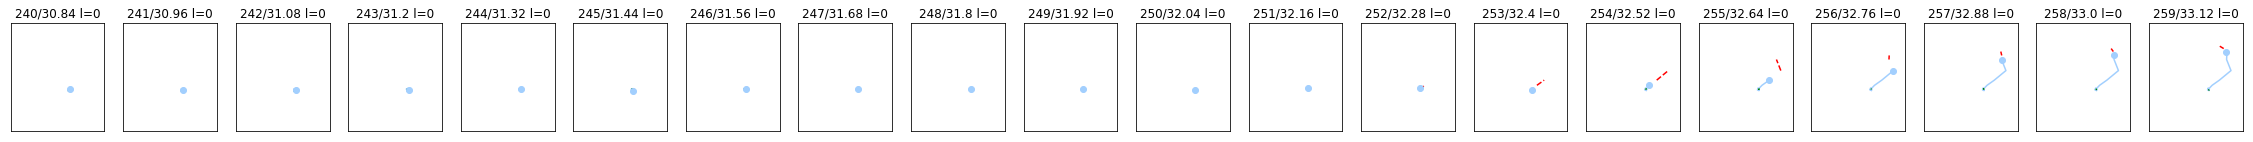

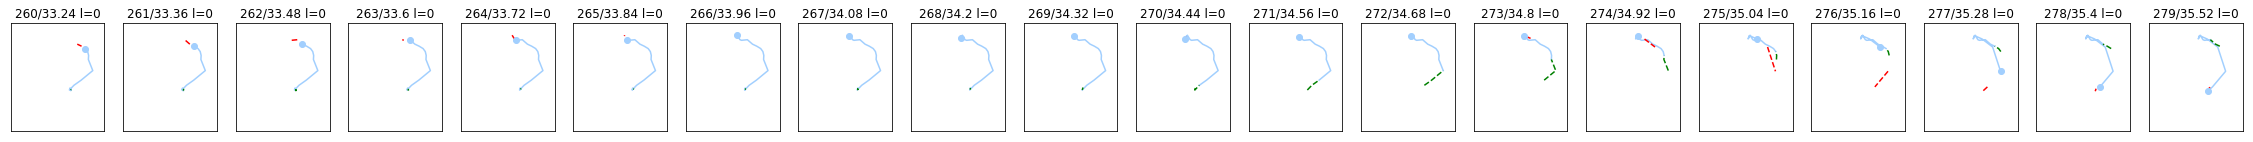

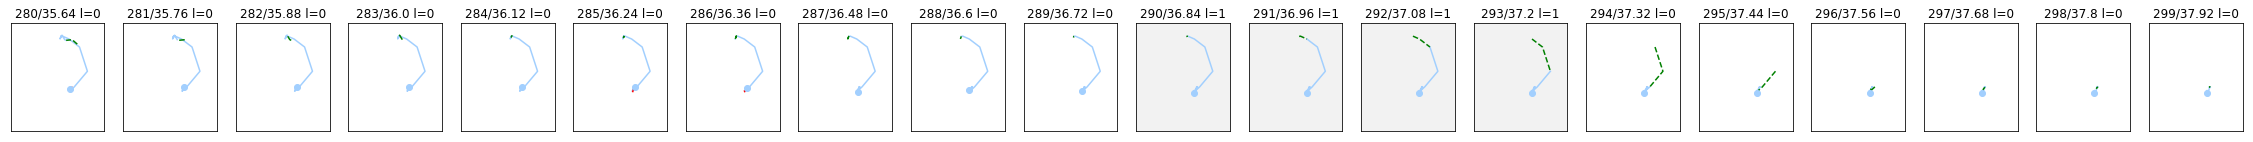

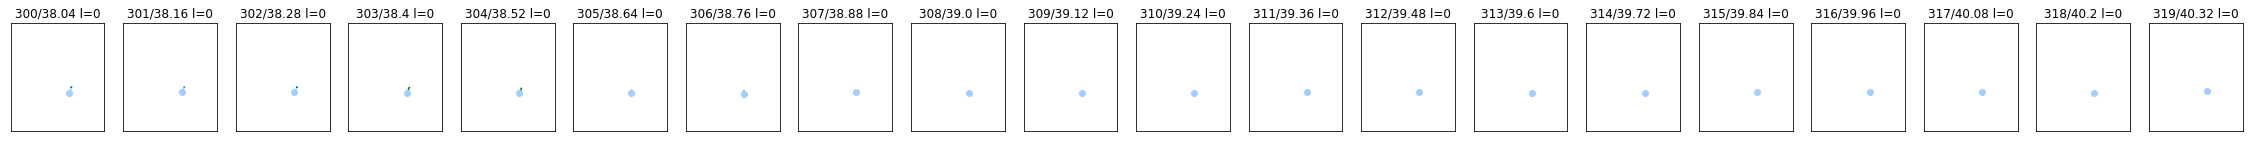

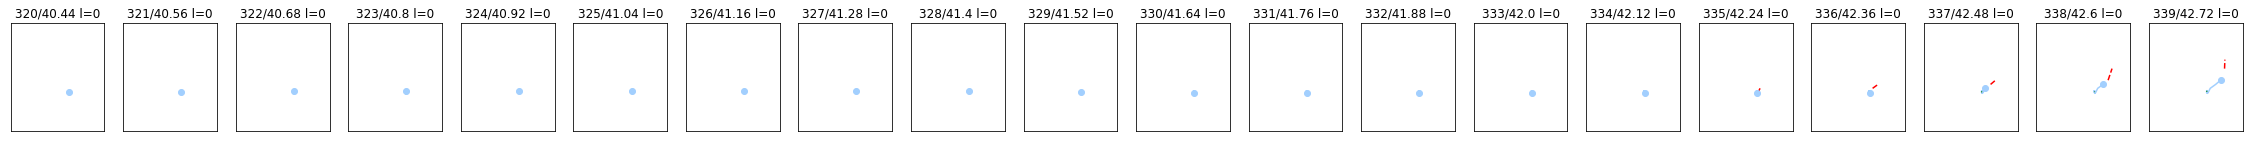

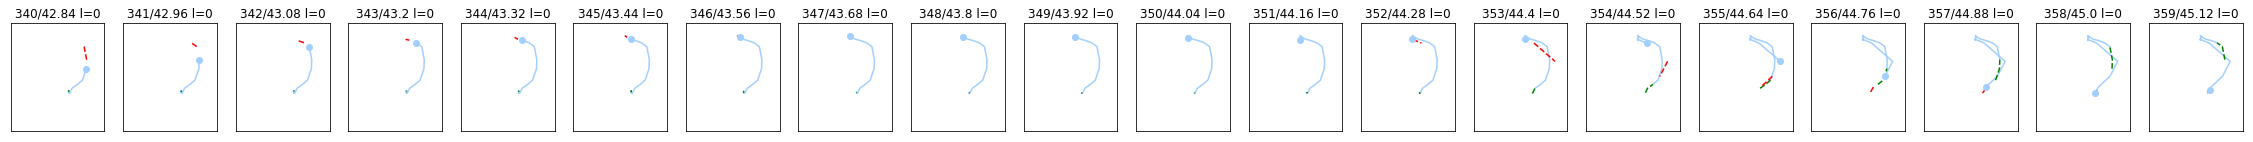

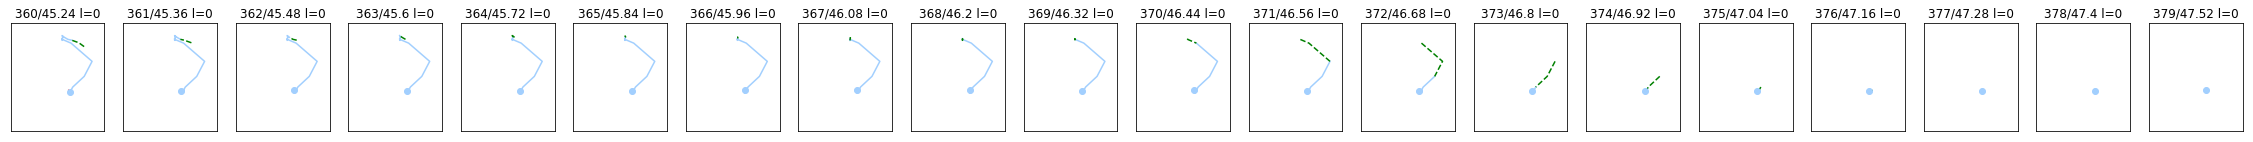

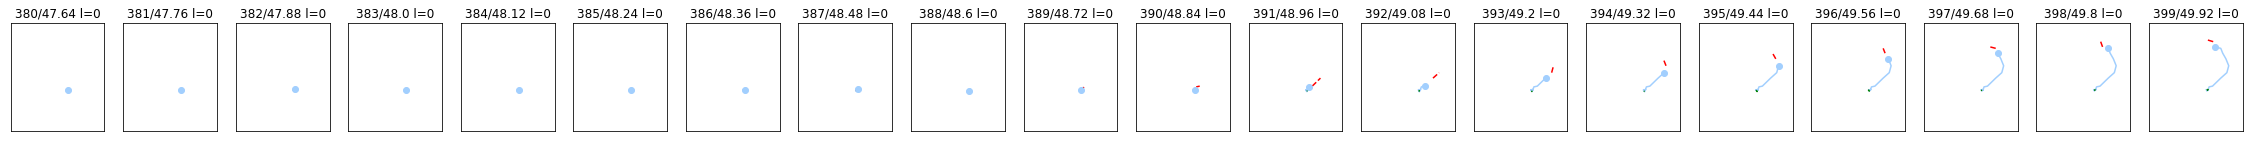

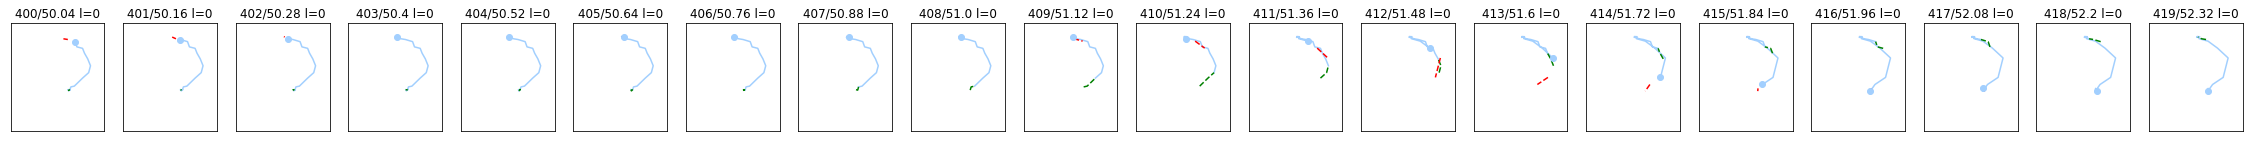

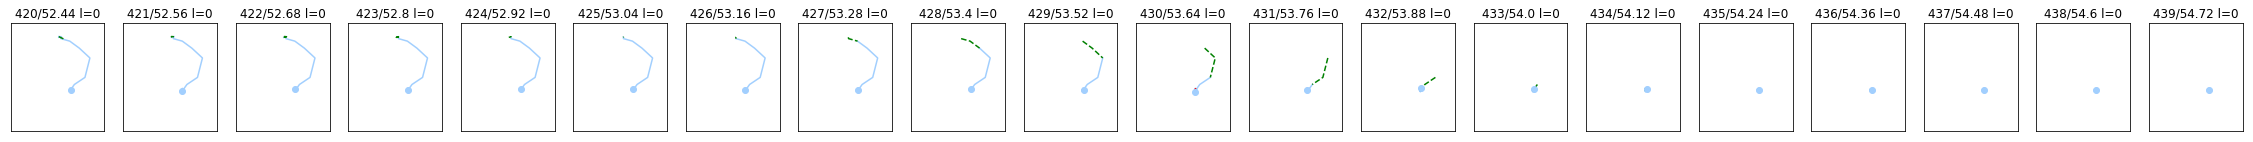

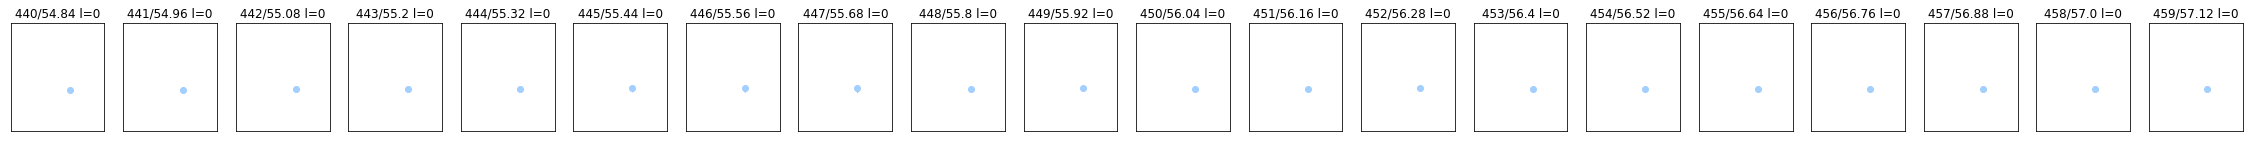

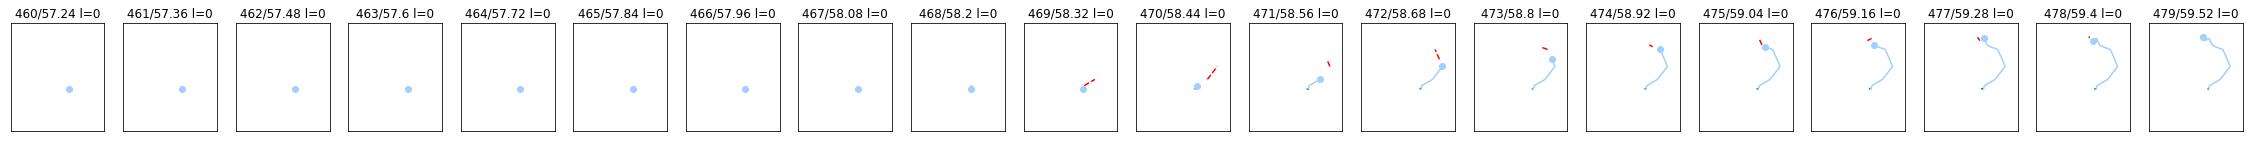

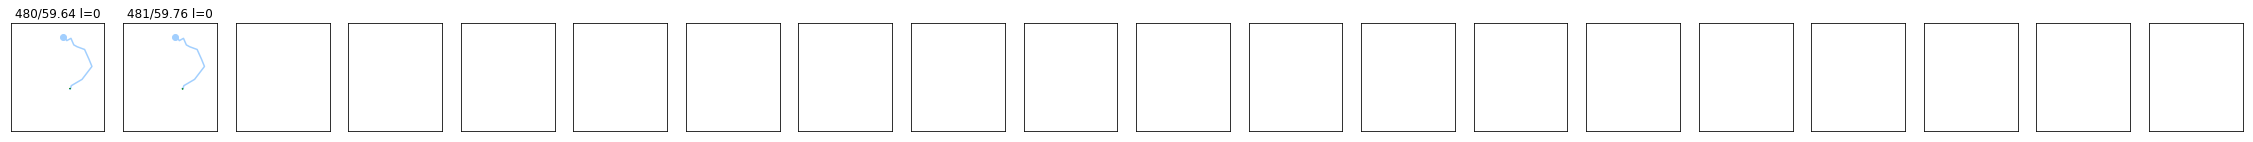

In [58]:
file_id = 20 # takeoff 3
plot_charts(de, file_id=file_id, tail=2, head=2, plots_per_row=20, body_part='rightWrist')

# Display the movement endpoints (in Milliseconds) of all non-zero labeled gestures:

In [ ]:
de.LabelGenerators[file_id].label_df.join(de.LabelGenerators[file_id].label_info)

Display the indices of movement ends of all non-zero labeled gestures:

In [ ]:
lgen = de.LabelGenerators[file_id]
y = lgen.y

gt = GestureTransformer(byrow=True, feature_names=feature_names)
X = gt.transform(lgen.X)

gt = GestureTransformer(feature_names)
P = gt.transform(de.X)

key = 'leftWrist'
kx = key + '_x'
ky = key + '_y'

# get the label which is used in the current file
lab = y[y>0][0]

this_set = True
if not this_set: #use all the data
    movementData = P[np.isclose(de.y,lab),:,:]
else:
    movementData = X[np.isclose(y,lab),:,:]

print(movementData.shape)
movementData = movementData[:,:,[feat_dict[kx],feat_dict[ky]]]
avgMovement = movementData.mean(axis = 0)
avgMovement